In [ ]:
!pip install keras-tuner


     |████████████████████████████████| 102kB 6.9MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-cp37-none-any.whl size=9569 sha256=537b61230d8eb81b4ac52c11da9aeaa25eee3d2f9c68aea3041dec9e209f34f4
  Stored in directory: /root/.cache/pip/wheels/95/99/a8/6b116b0f69be60cc475d1cd36680f3a09f284d86655bb99d93
Successfully built kt-legacy


In [ ]:
import tensorflow as tf
import kerastuner
import matplotlib.pyplot as plt
import numpy as np


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [ ]:
tf.__version__


'2.5.0'

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape


(60000, 28, 28)

In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

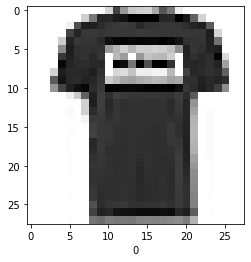

In [ ]:
plt.imshow(x_train[1], cmap='binary')
plt.xlabel(y_train[1])
plt.show()

In [ ]:
def create_model(hp):
  
  num_hidden_layers = 1
  num_units = 8
  dropout_rate = 0.1
  learning_rate = 0.01

  if hp:
    num_hidden_layers = hp.Choice('num_hidden_layers', values=[1,2,3])
    num_units = hp.Choice('num_units', values=[8,16,32])
    dropout_rate = hp.Float('dropout', min_value=0.1, max_value=0.5)
    learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.01)


  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
  model.add(tf.keras.layers.Lambda(lambda x: x/255.))

  for _ in range(0, num_hidden_layers):
    model.add(tf.keras.layers.Dense(num_units, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_rate))


  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  model.compile(
      loss='sparse_categorical_crossentropy',
      optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
      metrices=['accuracy']
  )
  return model




In [ ]:
create_model(None).summary()

TypeError: ignored

In [ ]:
class CustomTuner(kerastuner.tuners.BayesianOptimization):
  def run_trial(self, trial, *args, **kwargs):
    kwargs['batch_size']=trial.hyperparameters.Int('batch_size', 32,128,step=32)
    super(CustomTuner, self).run_trial(trial, *args, **kwargs)

In [ ]:
tuner = CustomTuner(
    create_model,
    objective='val_accuracy',
    max_trials=20,
    directory='logs',
    project_name='fashion_mnist',
    overwrite=True
)

In [ ]:
tuner.search_space_summary()

In [ ]:
tuner.search(
    x_train, y_train,
    validation_data=(x_test,y_test),
    epochs=5,verbose=False
)

In [ ]:
tuner.resuls_summary(1)

NameError: ignored

In [ ]:
model =tuner.get_bst_models(num_models=1)[0]

NameError: ignored

In [ ]:
model.summary()

NameError: ignored

In [ ]:
_ = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20, batch_size=128,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=300000)]
)

NameError: ignored